# Coupled‐Wave Theory of Distributed Feedback Lasers

This page comprises simulations from the manuscript H. Kogelnik and C. V. Shank, *Coupled‐Wave Theory of Distributed Feedback Lasers*. Journal of Applied Physics, **43** (1972) 2327–2335. [doi:10.1063/1.1661499](https://doi.org/10.1063/1.1661499)

We compare the different simulations in the paper with our code.

In [ ]:
# only run this cell when running in jupyter lite
import micropip
await micropip.install("numpy")
await micropip.install("matplotlib")
await micropip.install("scipy")

In [1]:
from modes import *

## Dispersion diagram for index modulation for various gain to coupling parameter ratios

{numref}`Kogelnik1` (left) calculates the dispersion diagram for index modulation for various gain ($\alpha_o$) to coupling ($\kappa$) parameter ratios. In case of index modulation we have that $\kappa= \pi n_1/\lambda_o$. We observe that the calculated result fits the result from {cite:p}`kogelnikCoupledWaveTheory1972`, as shown in {numref}`Kogelnik1` (right).

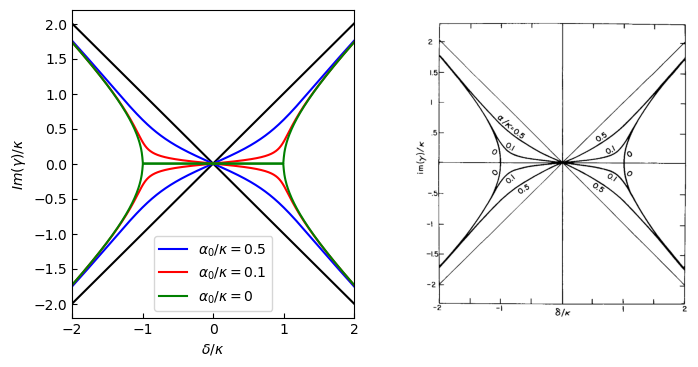

In [49]:
wc=np.linspace(-2,0,250)
gamma1=np.sqrt(1+(1/2-1.0j*wc)**2)
gamma2=np.sqrt(1+(1/10-1.0j*wc)**2)
gamma3=np.sqrt(1+(-1.0j*wc)**2)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot([-2,2],[-2,2],c='black')
ax[0].plot([-2,2],[2,-2],c='black')
ax[0].plot(wc,np.imag(gamma1),c='blue',label=r'$\alpha_0 / \kappa =0.5 $')
ax[0].plot(wc,-np.imag(gamma1),c='blue');
ax[0].plot(-wc,np.imag(gamma1),c='blue')
ax[0].plot(-wc,-np.imag(gamma1),c='blue');
ax[0].plot(wc,np.imag(gamma2),c='red',label=r'$\alpha_0 / \kappa =0.1 $')
ax[0].plot(wc,-np.imag(gamma2),c='red')
ax[0].plot(-wc,np.imag(gamma2),c='red')
ax[0].plot(-wc,-np.imag(gamma2),c='red');
ax[0].plot(wc,np.imag(gamma3),c='green',label=r'$\alpha_0 / \kappa =0 $')
ax[0].plot(wc,-np.imag(gamma3),c='green')
ax[0].plot(-wc,np.imag(gamma3),c='green')
ax[0].plot(-wc,-np.imag(gamma3),c='green');
ax[0].set_xlabel(r'$\delta / \kappa$')
ax[0].set_ylabel(r'$Im(\gamma) / \kappa$')
ax[0].set_xlim(-2,2)
ax[0].tick_params(direction='in')
ax[0].legend();
ax[1].imshow(mpimg.imread('images/Kogelnik2.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

## Dispersion diagram for gain modulation for various gain to coupling parameter ratios


{numref}`Kogelnik3` (left) calculates the dispersion diagram for index modulation for various gain ($\alpha_o$) to coupling ($\kappa$) parameter ratios. In case of index modulation we have that $\kappa= \frac{1}{2} j \alpha_1$. We observe that the calculated result fits the result from {cite:p}`kogelnikCoupledWaveTheory1972`, as shown in {numref}`Kogelnik3` (right).


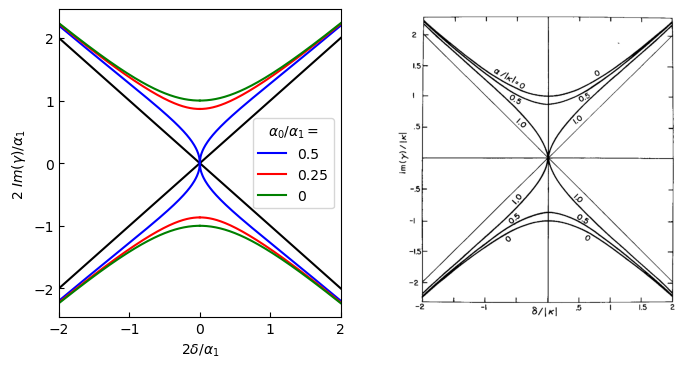

In [82]:
wc=np.linspace(-2,0,250)
gamma1=np.sqrt(-1+(1-1.0j*wc)**2)
gamma2=np.sqrt(-1+(1/2-1.0j*wc)**2)
gamma3=np.sqrt(-1+(-1.0j*wc)**2)
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot([-2,2],[-2,2],c='black')
ax[0].plot([-2,2],[2,-2],c='black')
ax[0].plot(wc,np.imag(gamma1),c='blue',label='0.5')
ax[0].plot(wc,-np.imag(gamma1),c='blue');
ax[0].plot(-wc,np.imag(gamma1),c='blue')
ax[0].plot(-wc,-np.imag(gamma1),c='blue');
ax[0].plot(wc,np.imag(gamma2),c='red',label='0.25')
ax[0].plot(wc,-np.imag(gamma2),c='red')
ax[0].plot(-wc,np.imag(gamma2),c='red')
ax[0].plot(-wc,-np.imag(gamma2),c='red');
ax[0].plot(wc,np.imag(gamma3),c='green',label='0')
ax[0].plot(wc,-np.imag(gamma3),c='green')
ax[0].plot(-wc,np.imag(gamma3),c='green')
ax[0].plot(-wc,-np.imag(gamma3),c='green');
ax[0].set_xlabel(r'$2\delta / \alpha_1$')
ax[0].set_ylabel(r'2 $Im(\gamma) / \alpha_1$')
ax[0].set_xlim(-2,2)
ax[0].tick_params(direction='in')
ax[0].legend(title=r'$\alpha_0 / \alpha_1 = $');
ax[1].imshow(mpimg.imread('images/Kogelnik4.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

## Mode spectrum for index coupling

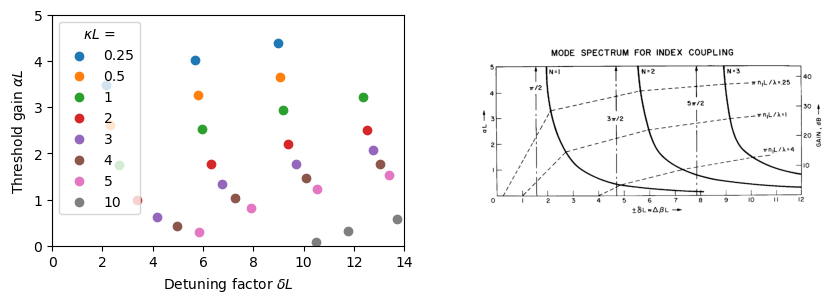

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def fff(x,kappa):
    return kappa*np.sinh(x)-1j*x

def dfff(x,kappa):
    return kappa*np.cosh(x)-1j

def glsol(kappa,node):
    xstart=1/np.sqrt(np.sinh(kappa/np.pi)) +(node-1)/(kappa**2/40+1) +1j*node*np.pi   
    nn= newton(fff, xstart, fprime=dfff,  args=(kappa,))
    if abs(nn.imag)>node*np.pi or abs(nn.imag)<(node-1)*np.pi:
        nn=newton(fff, xstart,  args=(kappa,))
        if abs(nn.imag)>node*np.pi or abs(nn.imag)<(node-1)*np.pi:
            return "NaN"
    return np.sqrt(nn**2-kappa**2)

fig, ax = plt.subplots(1,2,figsize=(10,3))
for k in [0.25,0.5,1,2,3,4,5,10]:
    fx1=[glsol(k,node) for node in range(1,5)]
    fx=[x for x in fx1 if np.iscomplex(x) ]
    ax[0].scatter([abs(x.imag) for x in fx ],[x.real for x in fx ], label=str(k))
ax[0].set_xlim(0,14)
ax[0].set_ylim(0,5)
ax[0].axvline(color="grey")
ax[0].set_xlabel(r"Detuning factor $\delta L$")
ax[0].set_ylabel(r"Threshold gain $\alpha L$")
ax[0].legend(title=r"$\kappa L$ =");
ax[1].imshow(mpimg.imread('images/Kogelnik5.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

## Mode spectrum for gain coupling

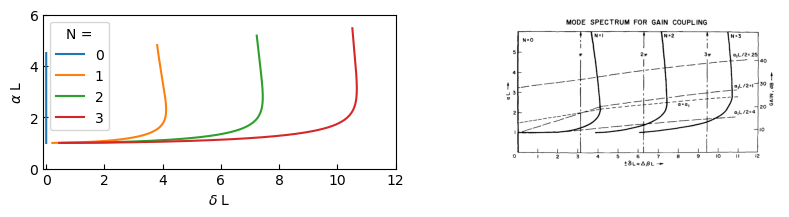

In [126]:
mode=[0,1,2,3]
aa=[0,2.9j,4.9j,6.9j]
kapaLmax=[1]+[abs(np.real((np.pi*a/2)/np.sinh(np.pi*a/2)))*0.997 for a in aa[1:] ]
fig, ax = plt.subplots(1,2,figsize=(10,2))
for mm,kLm,ar in zip(mode,kapaLmax,aa):
    testy=np.linspace(0.01,10,1500)
    testx=np.real((-1)**mm*(testy+np.pi*ar/2)/np.sinh(testy+np.pi*ar/2))
    kapaL=np.linspace(0.1,kLm,1500)
    gammaL=[optimize.newton(g, np.interp(kL, testx, testy+np.pi*ar/2), fprime=g1,fprime2=g2, args=((-1)**mm*1j*kL, )) for kL in kapaL]
    xx=(-1)**mm*kapaL*np.cosh(gammaL)
    ax[0].plot(np.imag(xx),np.real(xx),label=str(mm))
ax[0].set_xlabel(r'$\delta$ L')
ax[0].set_ylabel(r'$\alpha$ L')
ax[0].set_xlim(-0.1,12)
ax[0].set_ylim(0,6)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik7.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

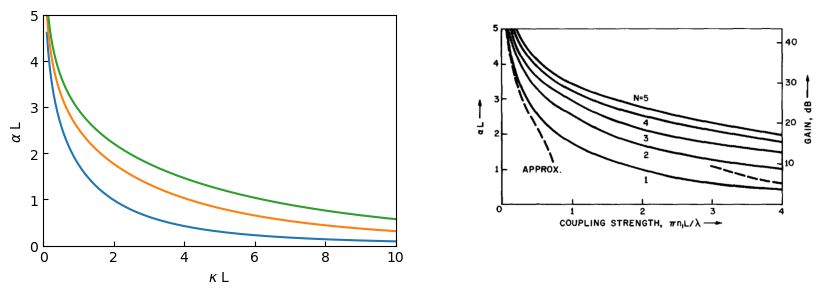

In [77]:
kapaL=np.linspace(0.1,10,500)
gammaL1=[optimize.newton(g, 2/kL**0.5+1j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]
gammaL2=[optimize.newton(g, 4/kL**0.5+2j*np.pi, fprime=g1,fprime2=g2, args=(-kL, )) for kL in kapaL]
gammaL3=[optimize.newton(g, 6/kL**0.5+3j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]
xx1=-1j*kapaL*np.cosh(gammaL1)
xx2=1j*kapaL*np.cosh(gammaL2)
xx3=-1j*kapaL*np.cosh(gammaL3)
fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(kapaL,np.real(xx1))
ax[0].plot(kapaL,np.real(xx2))
ax[0].plot(kapaL,np.real(xx3))
ax[0].set_xlabel(r'$\kappa$ L')
ax[0].set_ylabel(r'$\alpha$ L')
ax[0].set_xlim(0,10)
ax[0].set_ylim(0,5)
ax[0].tick_params(direction='in')
#ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik8.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

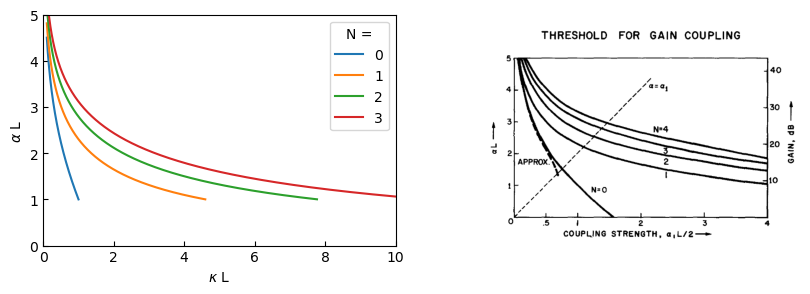

In [74]:
mode=[0,1,2,3]
aa=[0,2.9j,4.9j,6.9j]
kapaLmax=[1]+[abs(np.real((np.pi*a/2)/np.sinh(np.pi*a/2)))*0.997 for a in aa[1:] ]
fig, ax = plt.subplots(1,2,figsize=(10,3))
for mm,kLm,ar in zip(mode,kapaLmax,aa):
    testy=np.linspace(0.01,10,1500)
    testx=np.real((-1)**mm*(testy+np.pi*ar/2)/np.sinh(testy+np.pi*ar/2))
    kapaL=np.linspace(0.1,kLm,1500)
    gammaL=[optimize.newton(g, np.interp(kL, testx, testy+np.pi*ar/2), fprime=g1,fprime2=g2, args=((-1)**mm*1j*kL, )) for kL in kapaL]
    xx=(-1)**mm*kapaL*np.cosh(gammaL)
    ax[0].plot(kapaL,np.real(xx),label=str(mm))
ax[0].set_xlabel(r'$\kappa$ L')
ax[0].set_ylabel(r'$\alpha$ L')
ax[0].set_xlim(0,10)
ax[0].set_ylim(0,5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik9.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);




## Spatial intensity distribution of the different modes

In this section we plot a few of the spatial intensity distribution of the different lowest order modes. These intensity distributions are relevant when continuous operation is targeted, as they indicate how the electrical or optical pumping needs to be distributed to maintain lasing.

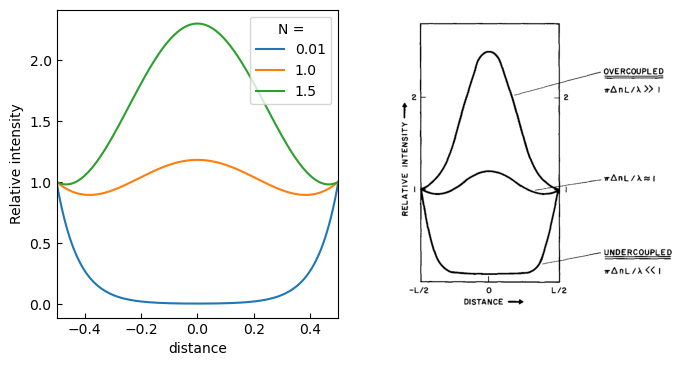

In [140]:
kapaL=[0.02,2,3]
gammaL1=[optimize.newton(g, 2/kL**0.5+1j*np.pi, fprime=g1,fprime2=g2, args=(kL, )) for kL in kapaL]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,4))
for kL,gL in zip(kapaL,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(kL/2))

ax[0].set_xlabel(r'distance')
ax[0].set_ylabel(r'Relative intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik10.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

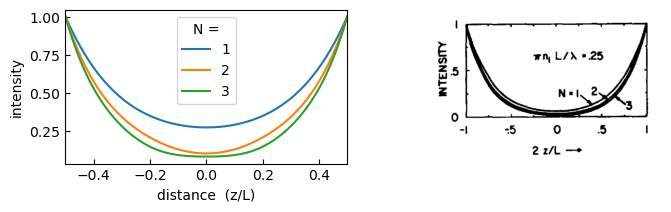

In [69]:
kL=0.75
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,2))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm))

ax[0].set_xlabel(r'distance  (z/L)')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik11a.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

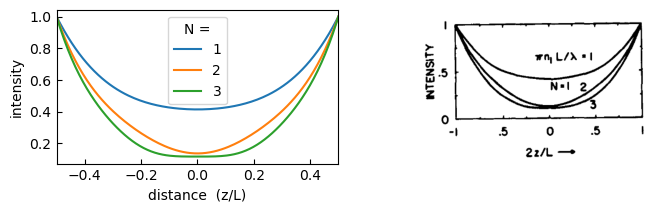

In [67]:
kL=1
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,2))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm))

ax[0].set_xlabel(r'distance  (z/L)')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik11b.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);


% Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=1$.


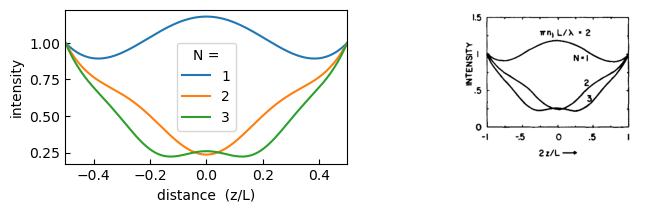

In [66]:
kL=2
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,2))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm))

ax[0].set_xlabel(r'distance  (z/L)')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik11c.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

% Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=2$.


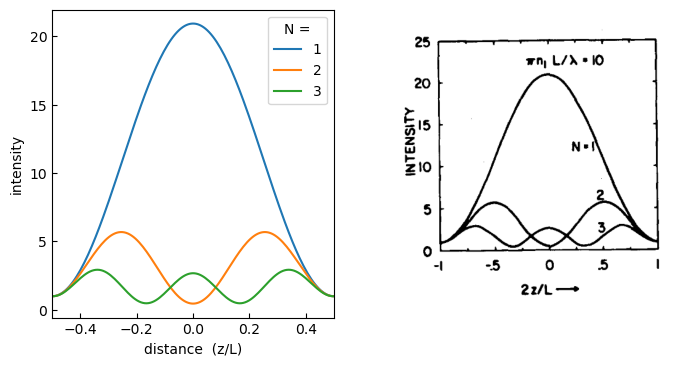

In [64]:
kL=10
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm))

ax[0].set_xlabel(r'distance  (z/L)')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik11d.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);

% Plot of the spatial intensity distribution for the first three modes at $\pi n_i L/\lambda=10$. 



```{figure} images/Kogelnik12a.png
:name: Kogelnik12a
:alt: spatial intensity distribution
:align: center

Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =0.25$. From {cite:p}`kogelnikCoupledWaveTheory1972`
```

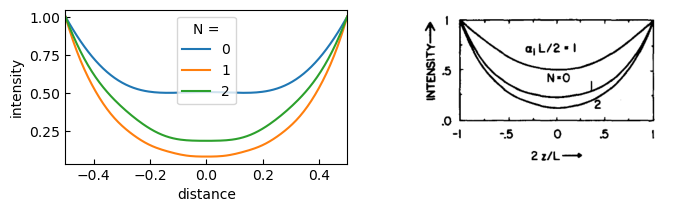

In [123]:
kL=-2j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,2))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm-1))

ax[0].set_xlabel(r'distance')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].axis('off');
ax[1].imshow(mpimg.imread('images/Kogelnik12b.png'));
ax[1].set(xticks=[], yticks=[]);

% Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =1$. 


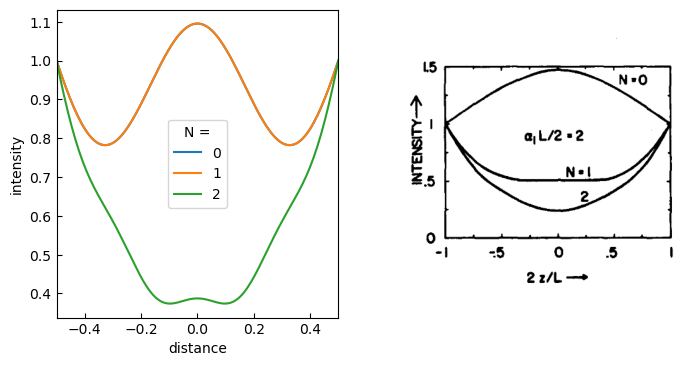

In [59]:
kL=-4j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,4))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm-1))

ax[0].set_xlabel(r'distance')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik12c.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);


% Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =2$.


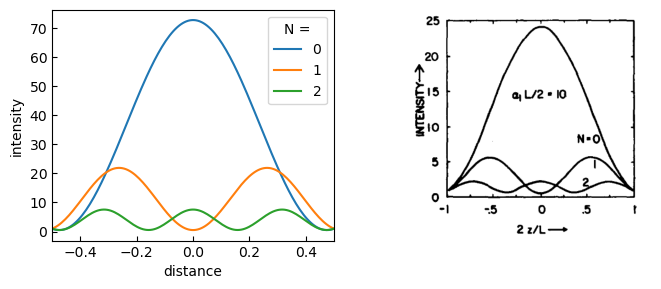

In [54]:
kL=-20j
mode=[1,2,3]
gammaL1=[optimize.newton(g,mm*(2/kL**0.5+1j*np.pi), fprime=g1,fprime2=g2, args=(kL, )) for mm in mode]

zz=np.linspace(-0.5,0.5,150)
fig, ax = plt.subplots(1,2,figsize=(8,3))
for mm,gL in zip(mode,gammaL1):
    I=np.abs(np.sinh(gL*(zz+0.5)))**2+np.abs(np.sinh(gL*(zz-0.5)))**2  
    Io=I[0]
    ax[0].plot(zz,I/Io,label=str(mm-1))

ax[0].set_xlabel(r'distance')
ax[0].set_ylabel(r'intensity')
ax[0].set_xlim(-0.5,0.5)
ax[0].tick_params(direction='in')
ax[0].legend(title='N =');
ax[1].imshow(mpimg.imread('images/Kogelnik12d.png'))
ax[1].axis('off');
ax[1].set(xticks=[], yticks=[]);



% Plot of the spatial intensity distribution for the first three modes at $\alpha L / 2 =10$. 

